In [1]:
import pandas
import scipy
import numpy

In [3]:
birth = pandas.Series([241945, 251527], index=['female', 'male'])

In [4]:
from scipy.special import comb

# The Math

$$ p(\theta | N, k) = \frac{p(k|\theta, N)\,p(\theta)}{\int p(k|\theta', N)\,p(\theta')\,\mathrm{d}\theta' }$$

$$ P(\mathrm{female} < 0.5) = \int I(\theta < 0.5)\,p(\theta | N, k) \,\mathrm{d}\theta$$

## MCMC

1. Choose $\theta_0$.
2. For each iteration $t > 0$
    1. Generate $\theta'$
    2. Calculate $\alpha = p(\theta'| N, k) / p(\theta_{t-1} | N, k)$
    3. Generate $u \sim \mathrm{uniform(0, 1)}$
    4. Set $\theta_t =\begin{cases} \theta' & u \leq \alpha\\\theta_{t-1} & \mathrm{else}\end{cases}$

In [5]:
k = birth['female']
N = birth['female'] + birth['male']

In [6]:
comb(N, k)

inf

In [9]:
theta_0 = 0.5

In [10]:
theta_0**k

0.0

In [11]:
theta_t = theta_0
w = 0.01
thetas = []
for i in range(5000):
    theta_p = numpy.random.uniform(max(theta_t - w, 0), min(theta_t + w, 1))
    alpha = numpy.exp(k*numpy.log(theta_p/theta_t) + (N-k)*numpy.log((1 - theta_p)/(1 - theta_t)))
    if numpy.random.uniform(0, 1) <= alpha:
        theta_t = theta_p
    thetas.append(theta_t)

In [12]:
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

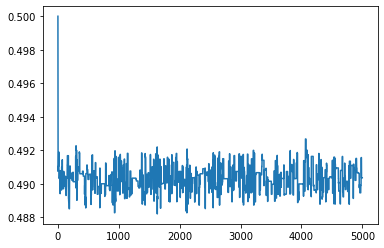

In [15]:
plt.plot(thetas)

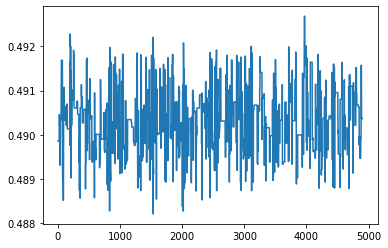

In [18]:
plt.plot(thetas[100:])

(array([ 11.,  14.,  59., 108., 130., 391., 350., 550., 517., 650., 524.,
        606., 272., 177., 211., 208., 102.,   7.,   4.,   9.]),
 array([0.48821267, 0.48843612, 0.48865957, 0.48888302, 0.48910646,
        0.48932991, 0.48955336, 0.4897768 , 0.49000025, 0.4902237 ,
        0.49044714, 0.49067059, 0.49089404, 0.49111749, 0.49134093,
        0.49156438, 0.49178783, 0.49201127, 0.49223472, 0.49245817,
        0.49268161]),
 <a list of 20 Patch objects>)

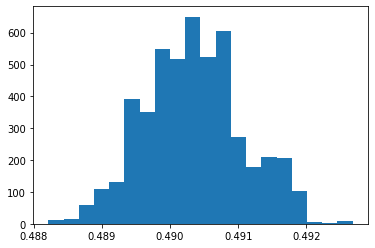

In [19]:
plt.hist(thetas[100:], bins=20)

In [21]:
numpy.mean(numpy.array(thetas[100:]) < 0.5)

1.0

In [23]:
numpy.mean(numpy.array(thetas[100:]) < 0.49)

0.32918367346938776

In [27]:
numpy.quantile(thetas[100:], [0.025, 0.5, 0.975])

array([0.48893332, 0.49033475, 0.49177785])

In [28]:
from scipy.stats import beta

In [29]:
xs = numpy.linspace(0.4, 0.6, 50)

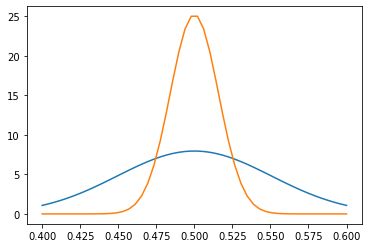

In [30]:
plt.plot(xs, beta.pdf(xs, 50, 50))
plt.plot(xs, beta.pdf(xs, 500, 500))

In [31]:
theta_t = theta_0
w = 0.01
thetas = []
for i in range(5000):
    theta_p = numpy.random.uniform(max(theta_t - w, 0), min(theta_t + w, 1))
    alpha = numpy.exp(k*numpy.log(theta_p/theta_t) + (N-k)*numpy.log((1 - theta_p)/(1 - theta_t)))
    alpha *= beta.pdf(theta_p, 500, 500) / beta.pdf(theta_t, 500, 500)
    if numpy.random.uniform(0, 1) <= alpha:
        theta_t = theta_p
    thetas.append(theta_t)

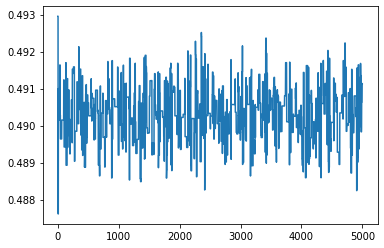

In [33]:
plt.plot(thetas)

(array([  4.,   0.,   5.,  67., 169., 199., 243., 446., 505., 819., 702.,
        709., 457., 265., 212., 133.,  43.,  15.,   4.,   3.]),
 array([0.48761134, 0.4878786 , 0.48814586, 0.48841312, 0.48868039,
        0.48894765, 0.48921491, 0.48948217, 0.48974943, 0.49001669,
        0.49028395, 0.49055121, 0.49081847, 0.49108573, 0.49135299,
        0.49162026, 0.49188752, 0.49215478, 0.49242204, 0.4926893 ,
        0.49295656]),
 <a list of 20 Patch objects>)

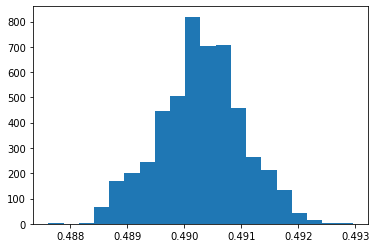

In [32]:
plt.hist(thetas, bins=20)

In [34]:
numpy.quantile(thetas[100:], [0.025, 0.5, 0.975])

array([0.48887407, 0.49031726, 0.49170177])